### Bayesian Data Analysis, 3rd ed
## Chapter 2, demo 4

Authors:
- Aki Vehtari <aki.vehtari@aalto.fi>
- Tuomas Sivula <tuomas.sivula@aalto.fi>

Probability of a girl birth given placenta previa (BDA3 p. 37).
Calculate the posterior distribution on a discrete grid of points by multiplying the likelihood and a non-conjugate prior at each point, and normalizing over the points. Simulate samples from the resulting non-standard posterior distribution using inverse cdf using the discrete grid.

In [1]:
# Import necessary packages

import numpy as np
from scipy.stats import beta

%matplotlib inline
import matplotlib.pyplot as plt

import arviz as az


In [2]:
# add utilities directory to path
import os, sys
util_path = os.path.abspath(os.path.join(os.path.pardir, 'utilities_and_data'))
if util_path not in sys.path and os.path.exists(util_path):
    sys.path.insert(0, util_path)

# import from utilities
import plot_tools

In [13]:
# edit default plot settings
plt.rc('font', size=12)
az.style.use("arviz-grayscale")

#### Calculate results

In [4]:
# data (437,543)
a = 437
b = 543

# grid of nx points
nx = 1000
x = np.linspace(0, 1, nx)

# compute density of non-conjugate prior in grid
# this non-conjugate prior is same as in Figure 2.4 in the book
pp = np.ones(nx)
ascent = (0.385 <= x) & (x <= 0.485)
descent = (0.485 <= x) & (x <= 0.585)
pm = 11
pp[ascent] = np.linspace(1, pm, np.count_nonzero(ascent))
pp[descent] = np.linspace(pm, 1, np.count_nonzero(descent))
# normalize the prior
pp /= np.sum(pp)

# unnormalised non-conjugate posterior in grid
po = beta.pdf(x, a, b)*pp
po /= np.sum(po)
# cumulative
pc = np.cumsum(po)

# inverse-cdf sampling
# get n uniform random numbers from [0,1]
n = 10000
r = np.random.rand(n)
# map each r into corresponding grid point x:
# [0, pc[0]) map into x[0] and [pc[i-1], pc[i]), i>0, map into x[i]
rr = x[np.sum(pc[:,np.newaxis] < r, axis=0)]

#### Plot results

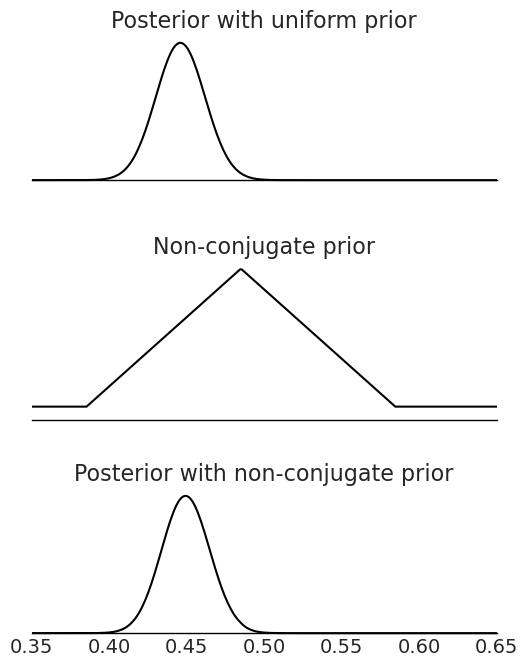

In [10]:
# plot 3 subplots
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(6, 8), constrained_layout=False)
# show only x-axis
plot_tools.modify_axes.only_x(axes)
# manually adjust spacing
fig.subplots_adjust(hspace=0.5)

# posterior with uniform prior Beta(1,1)
axes[0].plot(x, beta.pdf(x, a+1, b+1))
axes[0].set_title('Posterior with uniform prior')

# non-conjugate prior
axes[1].plot(x, pp)
axes[1].set_title('Non-conjugate prior')

# posterior with non-conjugate prior
axes[2].plot(x, po)
axes[2].set_title('Posterior with non-conjugate prior')

# cosmetics
#for ax in axes:
#    ax.set_ylim((0, ax.get_ylim()[1]))

# set custom x-limits
axes[0].set_xlim((0.35, 0.65));

Text(0.5, 1.0, 'Histogram of posterior samples')

<Figure size 800x600 with 0 Axes>

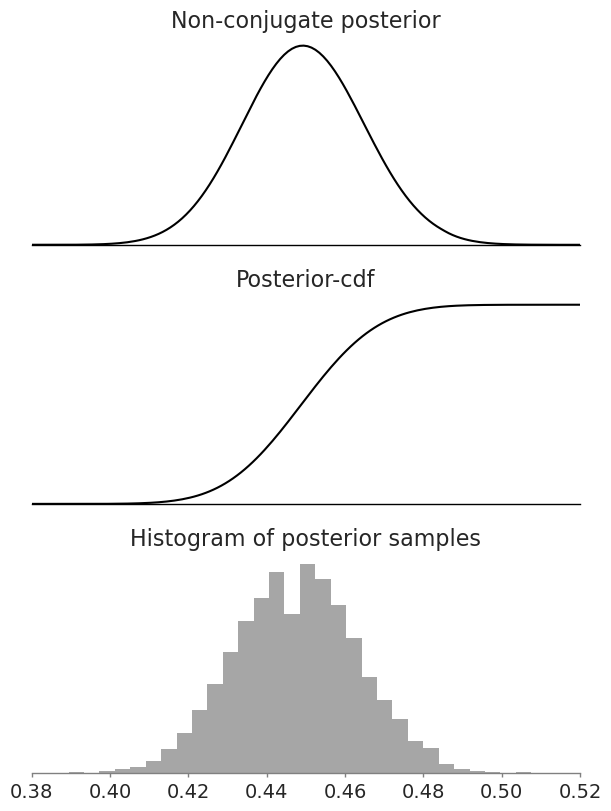

In [21]:
plt.figure(figsize=(8, 6))

fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(6, 8))

plot_tools.modify_axes.only_x(axes)

axes[0].plot(x, po)
axes[0].set_xlim((0.38, 0.52))
axes[0].set_title("Non-conjugate posterior")

axes[1].plot(x, pc)
axes[1].set_title("Posterior-cdf")

az.plot_posterior(rr, kind="hist", point_estimate=None, hdi_prob="hide", ax=axes[2], bins=30)
axes[2].set_title("Histogram of posterior samples")
